# VGG16

In [37]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install numpy==1.23.4

Note: you may need to restart the kernel to use updated packages.


In [40]:
import splitfolders

splitfolders.ratio("/kaggle/input/cat-dog/PetImages", output="Final", 
                  seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 24998 files [01:35, 261.05 files/s] 


In [41]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as C
from tensorflow.keras import regularizers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import load_model,Model
from tensorflow.python.keras.utils import conv_utils
from tensorflow.keras import regularizers, constraints, initializers
import pandas as pd
from tensorflow.keras.layers import GlobalAveragePooling2D
#import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

2.17.1


In [42]:
train_path=("/kaggle/working/Final/train")
val_path=("/kaggle/working/Final/val")
test_path=("/kaggle/working/Final/test")
batch_size = 32
img_height = 640
img_width = 640
no_of_clases = 2
clsses_name = ['Cat','Dog']
input_shape = (img_height,img_width,1)

datagen = ImageDataGenerator(rescale = 1./255,featurewise_center=True,horizontal_flip=False,vertical_flip = False,validation_split = 0.1,featurewise_std_normalization = True)

train_generator = datagen.flow_from_directory(train_path,target_size=(img_height,img_width),batch_size = batch_size, shuffle =True,class_mode = 'categorical')

validation_generator = datagen.flow_from_directory(val_path,target_size=(img_height,img_width),batch_size = batch_size, shuffle =True,class_mode = 'categorical')

print('train classes')
print(train_generator.class_indices)
print('train labels')
print(train_generator.labels)
print('validation clases')
print(validation_generator.class_indices)
print('validation labels')
print(validation_generator.labels)

Found 19998 images belonging to 2 classes.
Found 2498 images belonging to 2 classes.
train classes
{'Cat': 0, 'Dog': 1}
train labels
[0 0 0 ... 1 1 1]
validation clases
{'Cat': 0, 'Dog': 1}
validation labels
[0 0 0 ... 1 1 1]


In [43]:
print(len(train_generator))

625


In [44]:
pretrained_model = tf.keras.applications.VGG16(
                    input_shape=(640, 640, 3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg')

pretrained_model.trainable = False

In [45]:
inputs = pretrained_model.input
outputs1 = tf.keras.layers.Dense(1024, activation='relu')(pretrained_model.output)
dropout = tf.keras.layers.Dropout(0.5)(outputs1)
output2 = tf.keras.layers.Dense(1024,activation = 'relu')(dropout)
dropout2 = tf.keras.layers.Dropout(0.5)(output2)
outputs = tf.keras.layers.Dense(2,activation = 'softmax')(dropout2)
model = tf.keras.Model(inputs, outputs)
print(model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 640, 640, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 640, 640, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 640, 640, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 320, 320, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 320, 320, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 320, 320, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 160, 160, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 160, 160, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 160, 160, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 160, 160, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 80, 80, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 80, 80, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 80, 80, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 80, 80, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 40, 40, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 40, 40, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 40, 40, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 40, 40, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 20, 20, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │         525,3

 Total params: 16,291,650 (62.15 MB)

 Trainable params: 1,576,962 (6.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [46]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [47]:
history = model.fit(train_generator,validation_data=validation_generator,epochs=2)

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 23/625 ━━━━━━━━━━━━━━━━━━━━ 4:51 485ms/step - accuracy: 0.4996 - loss: 0.7806

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 354s 558ms/step - accuracy: 0.5527 - loss: 0.7066 - val_accuracy: 0.6597 - val_loss: 0.6236
Epoch 2/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 350s 555ms/step - accuracy: 0.6528 - loss: 0.6265 - val_accuracy: 0.6986 - val_loss: 0.5789


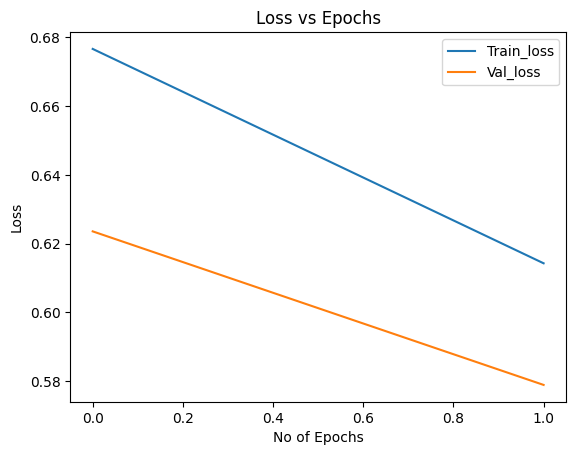

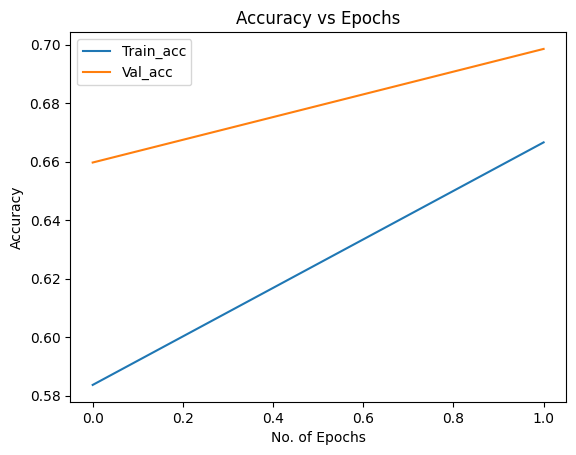

In [48]:
plt.plot(history.history['loss'],label='Train_loss')
plt.plot(history.history['val_loss'],label='Val_loss')
plt.legend()
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()


plt.plot(history.history['accuracy'],label = 'Train_acc')
plt.plot(history.history['val_accuracy'],label = 'Val_acc')
plt.legend()
plt.xlabel('No. of Epochs')
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show()

In [49]:
test_data = ImageDataGenerator(rescale=1./255)
test_generator = test_data.flow_from_directory(test_path, target_size=(640, 640), batch_size=32, shuffle=False, class_mode="categorical")

Found 2502 images belonging to 2 classes.


In [50]:
predictions = np.argmax(model.predict(test_generator), axis=1)
matrix = confusion_matrix(test_generator.labels, predictions)
report = classification_report(test_generator.labels, predictions, zero_division=0)

79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 472ms/step


In [51]:
pred = model.predict(test_generator,verbose=1)
test_generator_indices = np.argmax(pred,axis=1)

print(test_generator_indices)

79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 469ms/step
[1 1 1 ... 1 1 0]


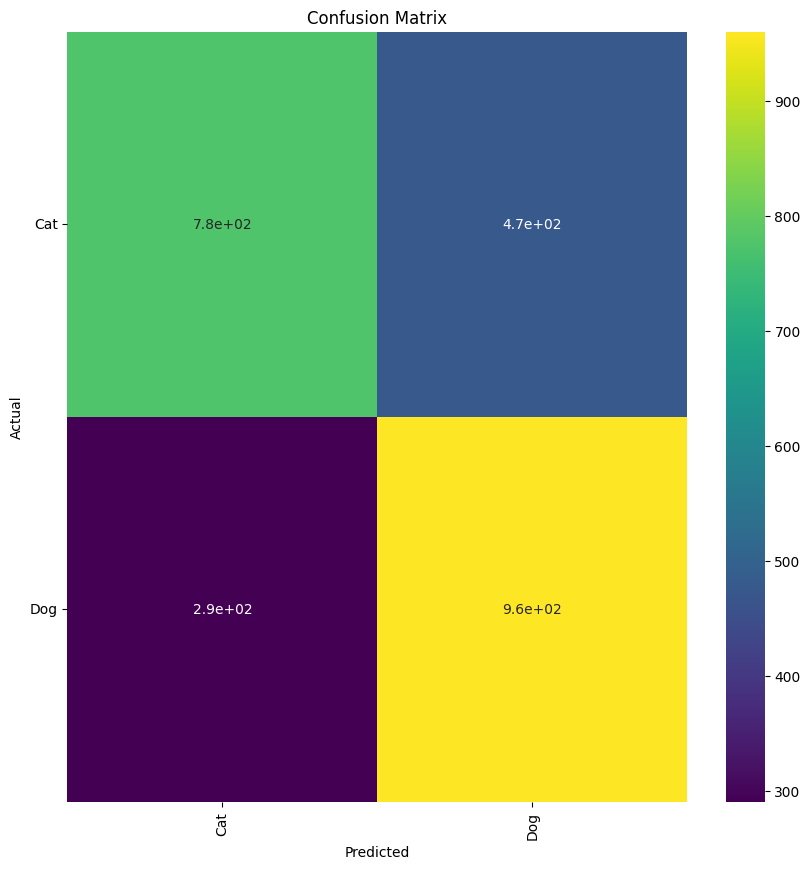

In [52]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(matrix, annot=True, cmap='viridis')
plt.xticks(ticks=np.arange(2) + 0.5, labels=test_generator.class_indices, rotation=90)
plt.yticks(ticks=np.arange(2) + 0.5, labels=test_generator.class_indices, rotation=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
fig.savefig("Confusion Matrix",dpi=700)

In [53]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.62      0.67      1251
           1       0.67      0.77      0.72      1251

    accuracy                           0.69      2502
   macro avg       0.70      0.69      0.69      2502
weighted avg       0.70      0.69      0.69      2502

